# K-Nearest Neighbors

## import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
dataset = pd.read_csv("data/Classified Data.csv")

dataset.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
dataset.shape

(1000, 12)

## Pair Plot

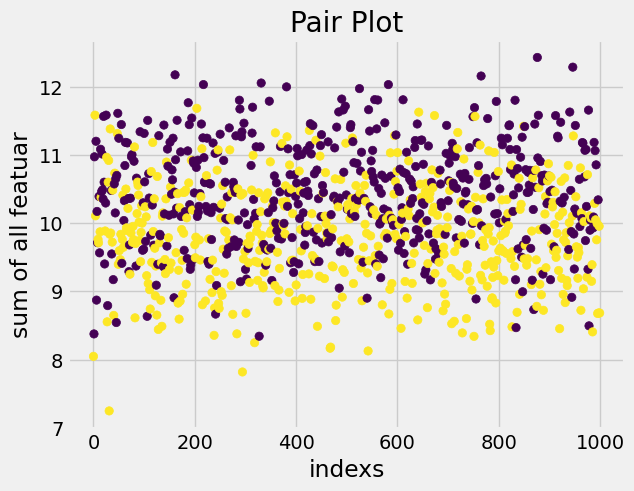

In [4]:
# print(plt.style.available)
plt.style.use("fivethirtyeight")
# y = x["SepalLengthCm"] + x["PetalLengthCm"] + x["PetalWidthCm"] + x["SepalWidthCm"]

plt.scatter(dataset.index, dataset.iloc[:, 1:11].sum(axis=1), c=dataset["TARGET CLASS"])

plt.title("Pair Plot")
plt.xlabel("indexs")
plt.ylabel("sum of all featuar")

plt.show()

<AxesSubplot: xlabel='TARGET CLASS'>

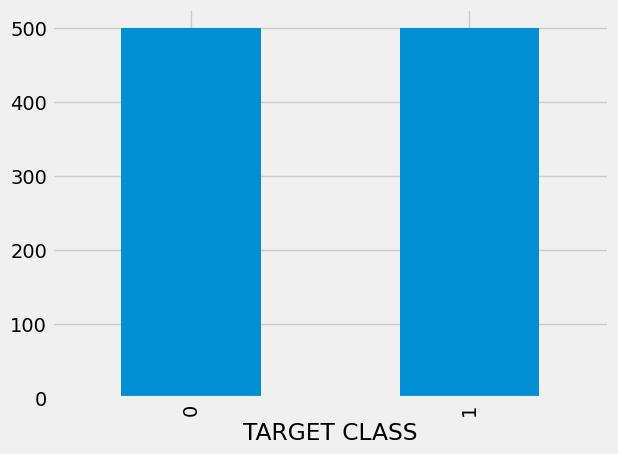

In [5]:
dataset.groupby('TARGET CLASS')['TARGET CLASS'].count().plot(kind='bar')

## Split Data to Training and Testing

In [6]:
training_data = dataset.sample(frac=0.8, random_state=25)

testing_data = dataset.drop(training_data.index)

In [7]:
training_data.shape

(800, 12)

In [8]:
testing_data.shape

(200, 12)

In [9]:
dataset.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [10]:
featuars = dataset.columns[1:-1]

labels = dataset.columns[-1]

In [11]:
x_train = training_data[featuars]
x_test = testing_data[featuars] 

y_train = training_data[labels]
y_test = testing_data[labels]

In [12]:
x_train.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
688,0.638619,1.006794,0.802694,0.916691,1.182170,0.616358,0.538759,0.728539,1.587912,1.105097
49,1.105788,0.683750,0.194366,0.749715,1.008333,1.266939,1.046832,0.994515,1.320822,1.025099
288,0.989674,1.611529,0.963638,0.864229,1.115568,1.545571,0.862588,1.138875,1.305536,1.404532


In [13]:
y_train.head(3)

688    1
49     1
288    0
Name: TARGET CLASS, dtype: int64

In [14]:
x_test.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922
14,0.801268,0.936390,0.696960,0.972440,0.851299,1.443119,1.194476,1.641496,1.118737,1.426573
15,1.061691,1.044892,0.599729,0.465285,0.930288,0.974341,1.213450,1.247551,1.217625,1.623154


In [15]:
y_test.head(3)

8     0
14    0
15    1
Name: TARGET CLASS, dtype: int64

## Building The Model

In [16]:
class K_NearestNeighbors:
    
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        
    def predict(self, x_test):
        predict_y_label = [self._predict(x) for x in x_test.to_numpy()]
        # print(predict_y_label)
        return predict_y_label
    
    def _predict(self, x):
        # compute distances
        distances = [self.euclidean_distances(x, x_train) for x_train in self.X.to_numpy()]
        # print(f"Distances: {distances}")
        
        # get k nearest neigbors for all samples, labels
        k_indexs = np.argsort(distances)
        # print(f"K_indexs: {k_indexs}")
        k_nearest_neigbors = k_indexs[:self.k]
        # print(f"k_nearest_neigbors: {k_nearest_neigbors}")
        k_nearest_neigbors_labels = [self.Y.iloc[i] for i in k_nearest_neigbors]
        # print(f"k_nearest_neigbors_labels: {k_nearest_neigbors_labels}")
        
        # majority vote, most common sample labels
        majority_vote = self.most_common(k_nearest_neigbors_labels)
        # print(f"majority_vote: {majority_vote}")
        
        return majority_vote
    
    
    def euclidean_distances(self, x_1, x_2):
        euclidean_distances = np.sqrt(np.sum((x_2 - x_1) ** 2))
        
        return euclidean_distances
    
    def most_common(self, values):
        most_common =  max(set(values), key=values.count)
        
        return most_common

## Choise The Best Value For K

In [17]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = K_NearestNeighbors(k=i)
    knn.fit(x_train,y_train)
    predictions = knn.predict(x_test)
    error_rate.append(np.mean(predictions != y_test))
    
lower_error = np.argsort(error_rate)[:10]
lower_error

array([23, 10, 81, 87, 67, 66, 86, 82, 63, 83], dtype=int64)

Text(0, 0.5, 'Error Rate')

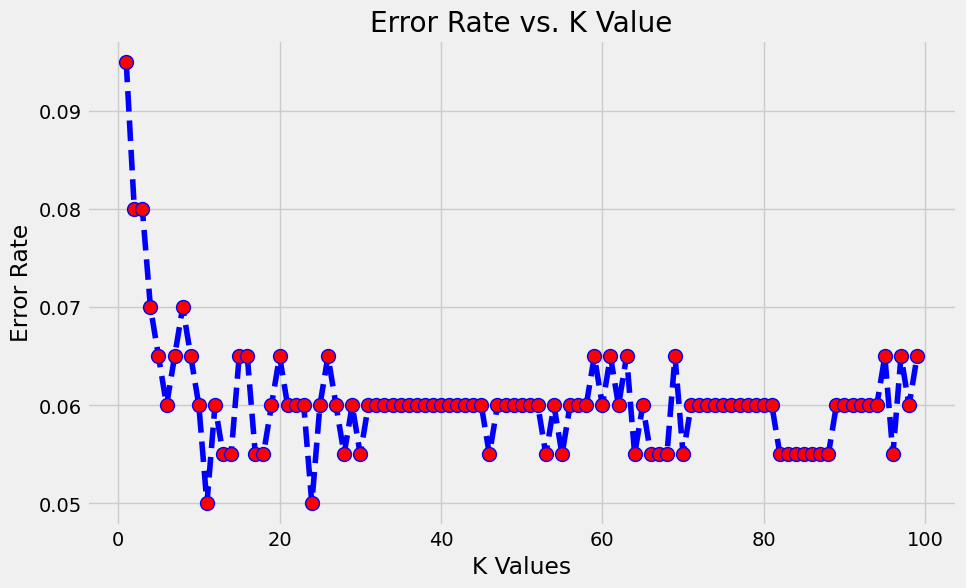

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

In [19]:
def accuracy(predictions, y_test):
    return np.sum(predictions == y_test) / len(y_test)

In [20]:
KNN = K_NearestNeighbors()
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test)

print(f"Accuracy: {accuracy(predictions, y_test)}%")

Accuracy: 0.92%


In [23]:
for i in lower_error:
    KNN = K_NearestNeighbors(k=i+1)
    KNN.fit(x_train, y_train)
    predictions = KNN.predict(x_test)

    print(f"If K value = {i}, The Accuracy is: {accuracy(predictions, y_test)}%\n")

If K value = 23, The Accuracy is: 0.95%

If K value = 10, The Accuracy is: 0.95%

If K value = 81, The Accuracy is: 0.945%

If K value = 87, The Accuracy is: 0.945%

If K value = 67, The Accuracy is: 0.945%

If K value = 66, The Accuracy is: 0.945%

If K value = 86, The Accuracy is: 0.945%

If K value = 82, The Accuracy is: 0.945%

If K value = 63, The Accuracy is: 0.945%

If K value = 83, The Accuracy is: 0.945%

